## T1 - Feature Selection Techniques 

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

As we all know "Curse of Dimensionality". I-E If we have many no of feaures it decreases accuracy of model.In order to solve these problem we dont select all the features from particular dataset.Instead we apply various techniques of Feature Selection.

### Feature Selection Techniques

##### Basic Techniques of Applying Feature Selection
1. Filter Method
2. Wrapper Method
3. Embedded Methods

##### Usefull Techniques
1. Univariate Selection
2. Feature Importamce Selection
3. Correlation Matrix with Heatmap

#### 1. Filter Method (Basic Technique)

From set of all features we will select Best subset of features using various techniques like : \
1. ANOVA Test
2. CHI Square Test
3. Correlation Coefficient 

Above 3 Techniques help us to select important features(These important features will be very much correlated with Target Output ) from Set of all features

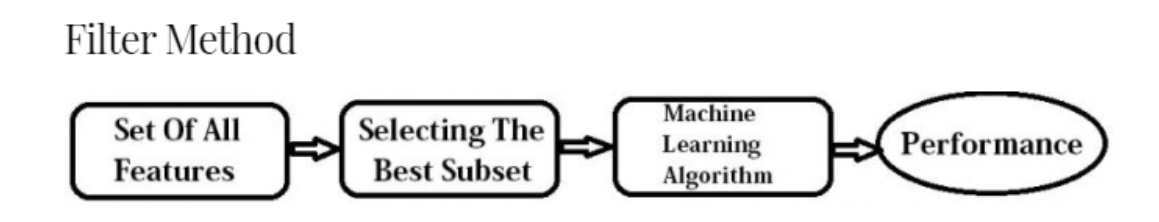

### 2. Wrapper Method (Basic Technique)

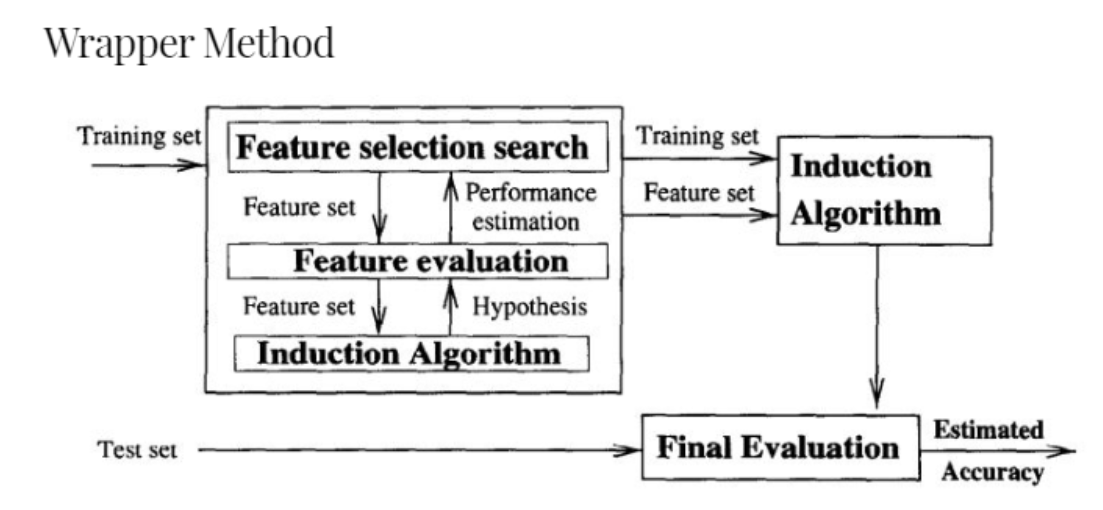

These Techniques can only be used if dataset size is Very Small.For Larger Data set it takes too much time , Not very usefull technique nowadays

1. __Forward Selection__: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Example : \
A B C  - O/P_VAR \
A - Train - Acc \
A,B - Train -Acc \
A,B,C - Train - Acc

If adding one feature doesnt improve accuracy we will skip that feature

2. __Backward Elimination__: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

Example : \
A B C - O/P_var \ 
A B C - Train - (Correlation of Each is checked with Target - Remove Least significant feature.If p value > 0.5 remove it) \
A C - Train - Acc

3. __Recursive Feature elimination__: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.


### 3. Embedded Methods

It finds all permutation and combination of all features in dataset . Each of permutation and combination is then trained to find accuracy.Whichever set has higher accuracy will be the final subset of features

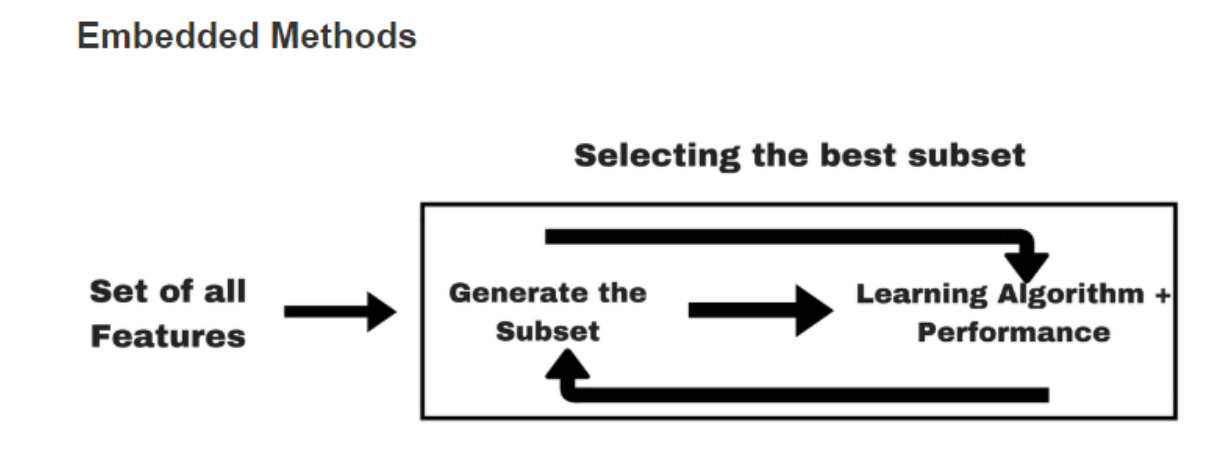

### Most Usefull Techniques

### 1. Univariate Selection

Various Stastical test are performed to select those features that have strongest relationship with output variable. \
"SelectKBest" library can be used to select best K Features from Dataset that have strong relationship with o/p.

Internally CHI Square test is used

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv('train_mobile_price_range.csv')
X = data.iloc[:,0:20] #Independent Columns
y = data.iloc[:,-1] #Target column

data.head()

## Based on Independent features we have to predict on which price range it belongs

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
## Now we have 20 features , How do we select best features

bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)

In [3]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

## Higher Score - More Important that feature is

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [10]:
print(featureScores.nlargest(10,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


### 2. Feature Importance Selection

You can get feature importance of each feature of your dataset by using feature importance property of model \
Feature Importance gives you a score for each feature , Higher the value more imp is feature. \
Feature Importance is inbuilt class that comes with Tree Based Classifier.It extracts top 10 features


In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [14]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [12]:
print(model.feature_importances_)

[0.06130193 0.0200123  0.03315833 0.02000927 0.03315098 0.01741218
 0.03661585 0.03343748 0.03846586 0.03329838 0.03457042 0.04789358
 0.04914115 0.38526093 0.03530754 0.03446252 0.03498413 0.01427815
 0.01701701 0.020222  ]


In [13]:
pd.Series(model.feature_importances_,index=X.columns)

battery_power    0.061302
blue             0.020012
clock_speed      0.033158
dual_sim         0.020009
fc               0.033151
four_g           0.017412
int_memory       0.036616
m_dep            0.033437
mobile_wt        0.038466
n_cores          0.033298
pc               0.034570
px_height        0.047894
px_width         0.049141
ram              0.385261
sc_h             0.035308
sc_w             0.034463
talk_time        0.034984
three_g          0.014278
touch_screen     0.017017
wifi             0.020222
dtype: float64

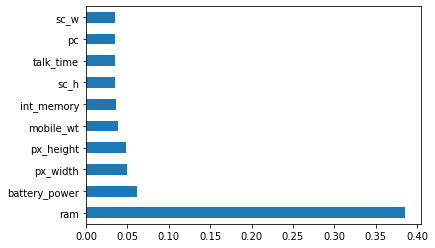

In [16]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3. Correlation Matrix with Heatmap

It show relationship between each features and feature with target variable.We will use heatmap to identify which features are mostly related to target variable.

In [17]:
import seaborn as sns
corrmat = data.corr()

In [18]:
corrmat.index

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

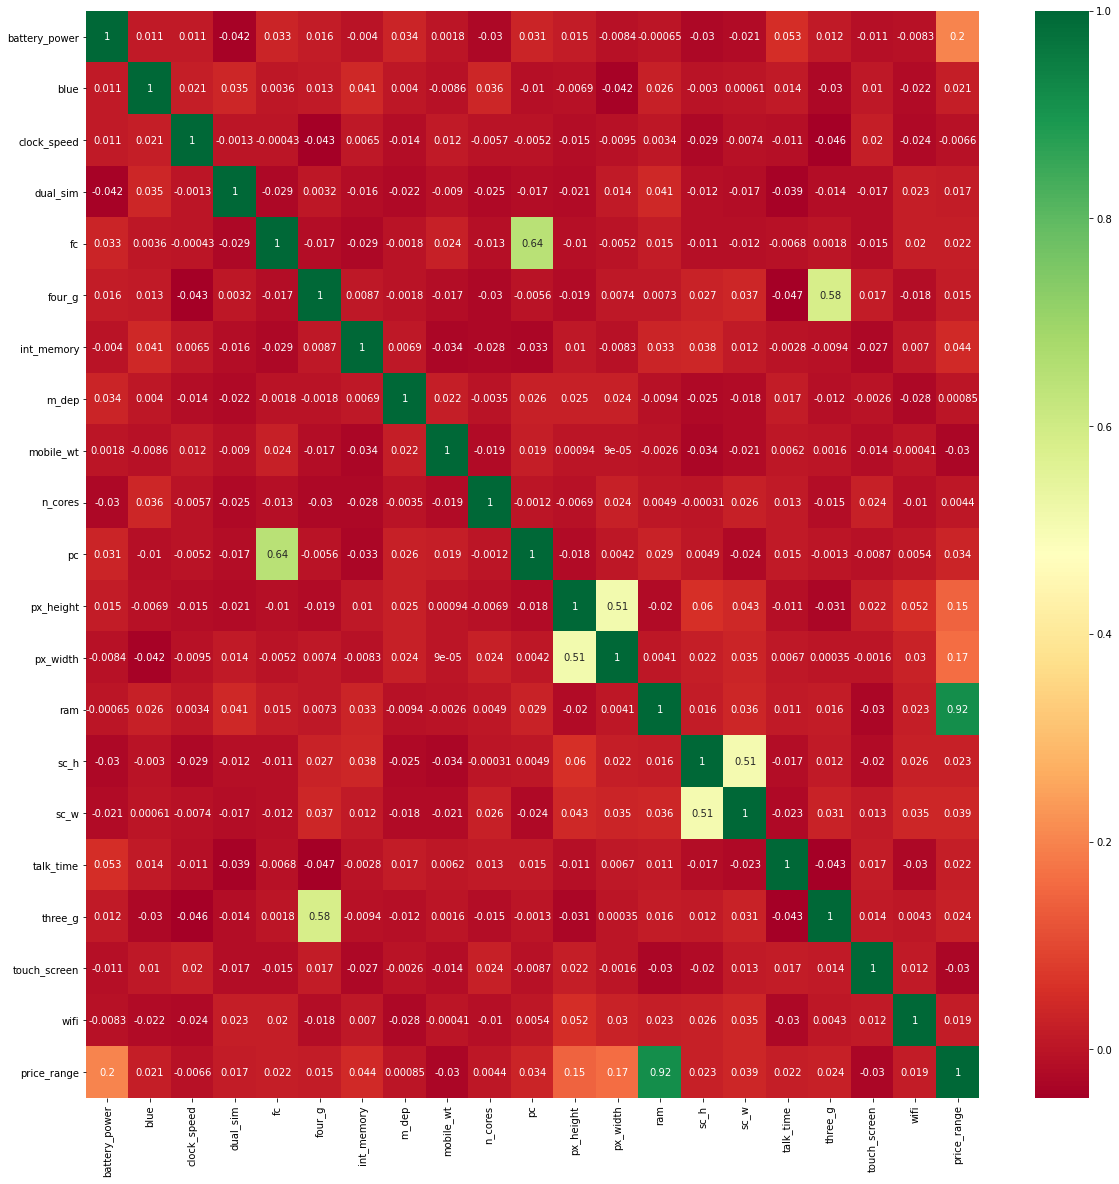

In [20]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### Correlation between ram and price is High, Similarly with batttery power,px_width,px_height

### Feature Selection Playlist 

#### 12 Feature Selection Techniques

1. Dropping Constant Features

### 1. Feature Selection - Dropping Constant Features

We will remove Features which have 